# An Analysis of USA Climbing's Youth Bouldering Series.

Author: Silas Chang

Course Project, UC Irvine, Math 10, S24

Post to course website: **Yes**

# Introduction.
## A Brief Explanation of Competitive Bouldering. 

*Note: This short introduction provides what I believe to be interesting context for some of the analyses later in the project, but is not essential to the actual data science. Feel free to skim.*

Every year, USA Climbing (the U.S. governing body for competitive sport climbing) holds officially sanctioned events where youth athletes aged 8-19 compete in three disciplines of climbing. In this project, we will focus on the bouldering discipline. 

In a bouldering competition, athletes have either a certain amount of attempts or a certain amount of time to try 4-10 'boulders,' which are short, intense, climbing challenges. On each boulder, athletes are awarded a 'Top' if they reached the top, and a 'Zone' if they reached a specific halfway-hold (a kind of partial credit). These challenges are created by officials known as 'Routesetters.' Routesetters have a difficult job - they must create a fair playing field where the best climbers are able to separate themselves from the pack. If the boulders are too easy (or too hard), there will be many ties in the scores, leading to less separation between the top climbers.

In this project, we will consider boulders from the 2022, 2023, and 2024 USA Climbing Youth Bouldering series, evaluating trends in the routesetting across competition levels and categories.

## The Dataset.
### Source

This dataset was compiled by me, as a python project separate from this one, when I was independently studying the basics of web-scraping. In the extra section at the end of the project, I do a small demonstration of the methods I used to collect the data.

It is not published anywhere, but it can be accessed from this <a href='https://drive.google.com/drive/folders/1Jsota5B4Irvs4Zwu6MBVGTXHjozMBYYu?usp=drive_link'>Google Drive link</a>.

### Structure

**Each row of the data represents one boulder from a competition.** For each boulder, the following are recorded:

**eid.** The event id. It is useful for retracing the website where results come from.

**Category.** Thecategory of competition the boulder was from. The first letter is the gender of the category, the last two letters signify age: YD-Under 12, YC-Under 14, YB-Under16, YA-Under 18, JR-Under 20. For example, MYB means Male Under 16.

**Location.** The location of the competition. The country is split geographically into 18 regions and 9 divisions.

**Level.** The level of the event, which may be the following, from lowest to highest: 'QE', 'Regional', 'Divisional', 'National'.

**Round.** The round within the event. Some competitions may have multiple rounds (e.g. qualifier, semifinal, final).

**#.** The index of the boulder within the competition. As mentioned earlier, competitions typically have anywhere between 4-10 boulders

**Climbers.** The number of athletes that attempted the boulder.

**Tops.** The number of athletes that scored a Top on the boulder.

**Zones.** The number of athletes that scored a Zone on the boulder.

**Lows.** This is the number of athletes that scored a Low Zone on the boulder. Note that most high-level competitions (divisionals and nationals) typically do not use low zones for scoring.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('bouldering_data.xlsx', index_col=0)
df.head(10)

,eid,Category,Location,Level,Round,#,Climbers,Tops,Zones,Lows
0,1645,MYD,R22,Regional,final,1,15,0,4,5
1,1645,MYD,R22,Regional,final,2,15,9,10,13
2,1645,MYD,R22,Regional,final,3,15,1,2,9
3,1645,MYD,R22,Regional,final,4,15,9,9,14
4,1645,FYD,R22,Regional,final,1,17,8,17,17
5,1645,FYD,R22,Regional,final,2,17,12,13,17
6,1645,FYD,R22,Regional,final,3,17,6,6,12
7,1645,FYD,R22,Regional,final,4,17,13,13,16
8,1667,FJR,D1,Divisional,final,1,13,5,6,0
9,1667,FJR,D1,Divisional,final,2,13,9,11,0


# Part I. Feature Engineering and DataFrame Manipulation.

In this section, we use the pandas Dataframe to create new columns for use in later sections, as well as an entire new DataFrame where each row contains data one competition, rather than one boulder. 

### Proportion stats.

Alone, the raw number of tops and zones is not very useful if we wish to compare boulders from different competitions. as a boulder that was topped by 12/50 competitors is likely harder than a boulder topped by 8/15. Using pandas, we can create features 'Tpct', 'Zpct', and 'Lpct' that are simply the proportion of athletes receiving a score:

$ \text{Tpct} = \frac{\# Tops}{\# Climbers} $

$ \text{Zpct} = \frac{\# Zones}{\# Climbers} $

$ \text{Lpct} = \frac{\# Lows}{\# Climbers} $

In [2]:
df['Tpct'] = df['Tops'] / df['Climbers']
df['Zpct'] = df['Zones'] / df['Climbers']
df['Lpct'] = df['Lows'] / df['Climbers']

df.head(5)

,eid,Category,Location,Level,Round,#,Climbers,Tops,Zones,Lows,Tpct,Zpct,Lpct
0,1645,MYD,R22,Regional,final,1,15,0,4,5,0.000000,0.266667,0.333333
1,1645,MYD,R22,Regional,final,2,15,9,10,13,0.600000,0.666667,0.866667
2,1645,MYD,R22,Regional,final,3,15,1,2,9,0.066667,0.133333,0.600000
3,1645,MYD,R22,Regional,final,4,15,9,9,14,0.600000,0.600000,0.933333
4,1645,FYD,R22,Regional,final,1,17,8,17,17,0.470588,1.000000,1.000000


### Category Dummies. 

Currently, age and gender are both stored in the 'Category' column. Later, it will be useful to have these attributes in a separate columns.

In [3]:
def age(x):
    if 'J' in x:
        return 'J' 
    else:
        return x[2]
    
def gender(x):
    return x[0]

df['Gender'] = df['Category'].apply(gender)
df['Age'] = df['Category'].apply(age)

df.head(5)

,eid,Category,Location,Level,Round,#,Climbers,Tops,Zones,Lows,Tpct,Zpct,Lpct,Gender,Age
0,1645,MYD,R22,Regional,final,1,15,0,4,5,0.000000,0.266667,0.333333,M,D
1,1645,MYD,R22,Regional,final,2,15,9,10,13,0.600000,0.666667,0.866667,M,D
2,1645,MYD,R22,Regional,final,3,15,1,2,9,0.066667,0.133333,0.600000,M,D
3,1645,MYD,R22,Regional,final,4,15,9,9,14,0.600000,0.600000,0.933333,M,D
4,1645,FYD,R22,Regional,final,1,17,8,17,17,0.470588,1.000000,1.000000,F,D


### Quali-Final Dataframe. 

In the next section, we will explore whether or not the qualifier and final round results of divisional level events are correlated. We will need a DataFrame where each row observation represents a divisional competition, with the following features:

**eid**: The event id. 

**Gender**: The gender category of the competition. 

**Age**: The age category of the competition. 

**Quali_TPct**: The average top percentage of boulders in the qualifying round. 

**Final_TPct**: The average top percentage of boulders in the final round.

In [4]:
Divisionals_df = df.loc[df['Level'] == 'Divisional']
Divisionals_df.reset_index(inplace=True, drop=True)

# take advantage of the results being in a consistent order:
# 4 final boulders, 4 quali boulders.

data = []

for i in range(0, Divisionals_df.shape[0], 8):
    eid = Divisionals_df.loc[i]['eid']
    gender = Divisionals_df.loc[i].Gender
    age = Divisionals_df.loc[i].Age 
    QTP = Divisionals_df.loc[(i+4):(i+7)]['Tpct'].mean()
    FTP = Divisionals_df.loc[i:(i+3)]['Tpct'].mean()

    data.append([eid, gender, age, QTP, FTP])

Quali_Final = pd.DataFrame(data, columns=['eid', 'Gender', 'Age', 'Quali_Tpct', 'Final_Tpct'])

Quali_Final.head(8)

,eid,Gender,Age,Quali_Tpct,Final_Tpct
0,1667,F,J,0.316667,0.423077
1,1667,F,A,0.151961,0.192308
2,1667,F,B,0.052885,0.303571
3,1667,F,C,0.204082,0.326923
4,1667,M,J,0.218750,0.265625
5,1667,M,A,0.140351,0.333333
6,1667,M,B,0.148936,0.464286
7,1667,M,C,0.296875,0.480769


# Part II. Seaborn Visualizations. 

### Top Rates by Category

Here, we can plot ten boxplots next to each other and compare the top rates across the categories of competition. Note that we limit the sample to only championship events (Regionals and above).

total sample size = 4064 boulders


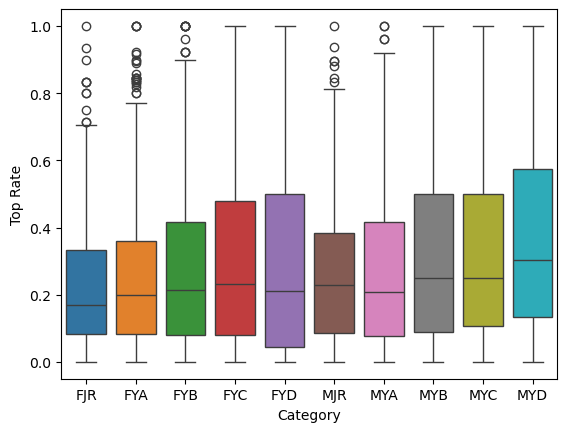

In [5]:
championships_df = df.loc[df['Level'] != 'QE']
championships_df = championships_df.sort_values(by='Category')
print(f'total sample size = {championships_df.shape[0]} boulders')

plot = sns.boxplot(championships_df, x='Category', y='Tpct', hue='Category');
plot.set_ylabel('Top Rate');

The younger categories of C (under 14) and D (under 12) tend to get the highest top rates. This makes some amount of sense, routesetters tend to go easier on the younger kids, in order to not completely shut them down mentally.

We can also view this same data in ten separate histograms:

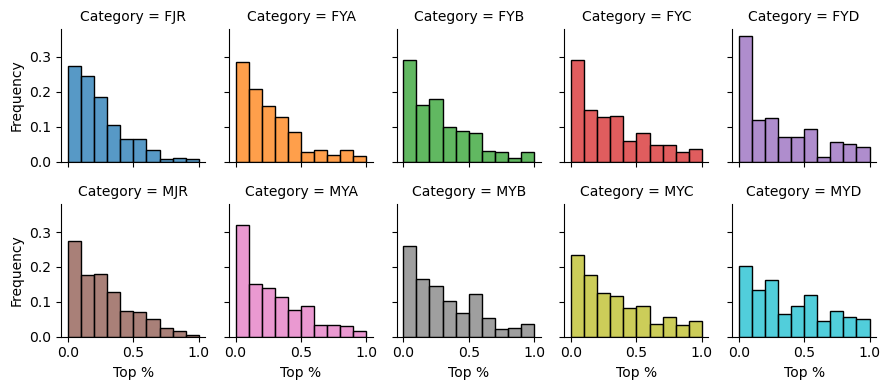

In [6]:
grid = sns.FacetGrid(championships_df, col='Category', col_wrap=5, hue='Category');
grid.map(sns.histplot, 'Tpct', bins=10, stat='proportion');
grid.set_ylabels('Frequency');
grid.set_xlabels('Top %');
grid.figure.set_size_inches(9, 4)
grid.figure.tight_layout()

An interesting result is that female youth D has the highest proportion of boulders topped by less than 10% of the field. 

From this plot, it is easier to see that all categories follow roughly the same distribution, but the scale of each is slightly different.

# Part III. Linear Regression Analysis of Qualifier-Final Events.

In this section, we will analyze results from divisional championships, which have a qualifying round and a final round. I was talking to my climbing coach about possible interesting topics for this project, and she brought up the idea of routesetting correction: sometimes, if a qualifying round of boulders is overall too easy, then the setters will tweak the finals boulders to be harder to correct for their misjudgement of the athlets in the qualifiers, and vice versa. 

Setter over-correction is something that has been observed as well: rounds where the qualifying round is embarrassingly easy, so the routesetters make the final round's boulders hard (or the reverse may happen). If setter over-correction is a pattern, then we ought to see a negative relation between qualfier top% and final top%, that is, when one decreases the other increases. 


### All Categories. 

In this first cell, we fit a simple linear model to the data.

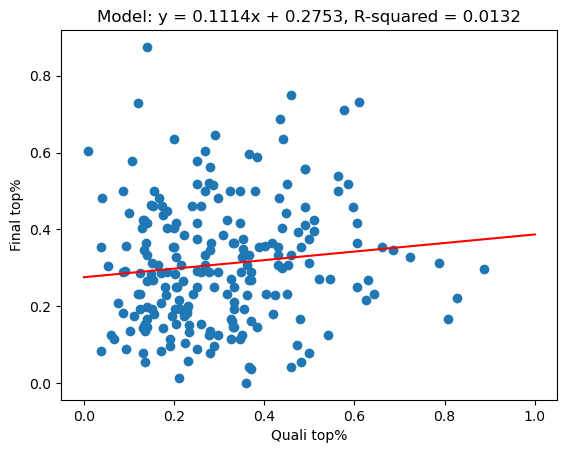

In [7]:
from sklearn.linear_model import LinearRegression

X = np.array(Quali_Final['Quali_Tpct']).reshape(-1, 1)
y = np.array(Quali_Final['Final_Tpct'])
lm = LinearRegression();
lm.fit(X, y)



fig, ax = plt.subplots()
ax.set_title(f'Model: y = {lm.coef_[0]:.4f}x + {lm.intercept_:.4f}, R-squared = {lm.score(X, y):.4f}')
ax.set_xlabel('Quali top%')
ax.set_ylabel('Final top%')
ax.scatter(X, y)

x_graph = np.linspace(0, 1, 200).reshape(-1, 1)
ax.plot(x_graph, lm.predict(x_graph), c='r')
plt.show()

The R-squared value is near zero, so a strong linear correlation relationship between qualifier and final top percentages does not exist, at least over all categories of competition. 

### Individual Categories

Though there is no relation between Qualifier top percentages and Final top percentages over all categories, some categories are more difficult to set for than others. We will run a similar regression procedure for all 8 categories that compete at divisional championships, to see if any particular category is more prone to difficulty overcorrection. 

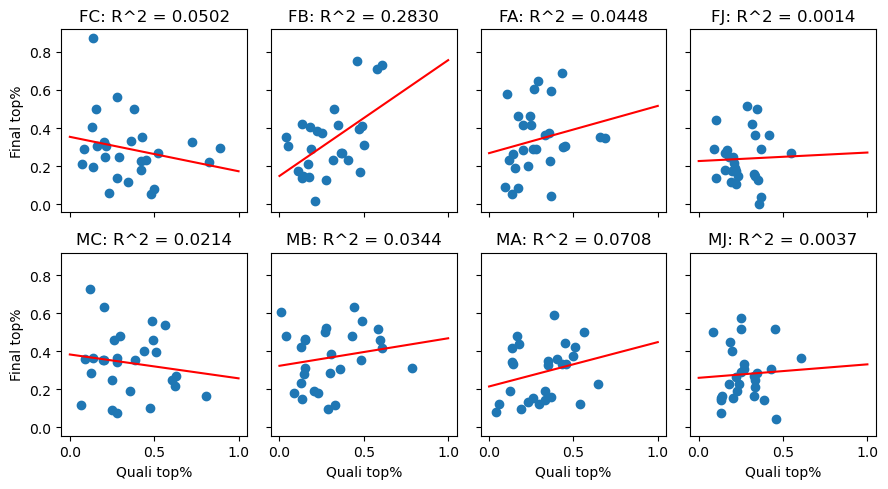

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharey=True, sharex=True)
categories = ['C', 'B', 'A', 'J']

for i in range(4):
    ax[1, i].set_xlabel('Quali top%')
    for j in [0, 1]:
        if j == 0:
            gen = 'F'
        else:
            gen = 'M'
        
        c_df = Quali_Final.loc[(Quali_Final['Age'] == categories[i]) & (Quali_Final['Gender'] == gen)]
        X = np.array(c_df['Quali_Tpct']).reshape(-1, 1)
        y = np.array(c_df['Final_Tpct'])

        lm.fit(X, y)
        ax[j, i].scatter(X, y)
        ax[j, i].plot(x_graph, lm.predict(x_graph), c='r');
        ax[j, i].set_title(f'{gen}{categories[i]}: R^2 = {lm.score(X, y):.4f}')
        
ax[0, 0].set_ylabel('Final top%')
ax[1, 0].set_ylabel('Final top%')

fig.set_size_inches(9, 5)
fig.tight_layout()
plt.show()


For all of the individual categories except Female B, the R-squared value is also near zero, so there is no linear correlation for any of them either. In the case of Female B (R^2 ~.28), the linear coefficient is actually positive (upwards slope), which is the opposite of what we would expect to see if the routesetters were overcorrecting their rounds.

# Part IV. Binary Classification of #1 and #4 Boulders.

Though there is no rule that forces routesetters to order boulders according to difficulty, in a 4-boulder round, climbers tend to agree that boulder #1 of the round tends to be the easiest, with boulder #4 being the hardest. In this section, we will fit logistic-regression and nearest-neighbor type classifiers to data from regional-level competitions, and attempt to discern between them. 

### Visualization.

The below plot shows a scatterplot of Tpct and Zpct with color showing the boulder number. Note that Tpct is a limiting factor of Zpct, since every Top also scores a Zone. 

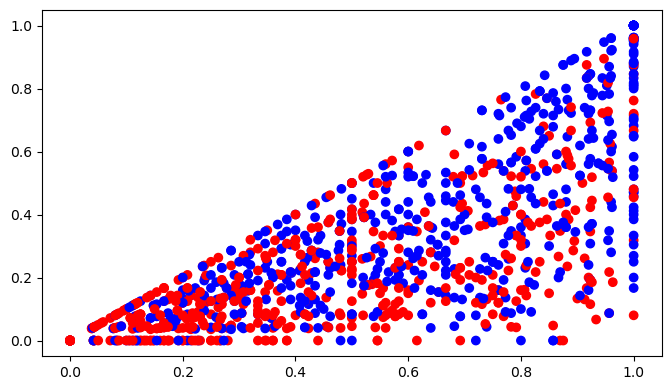

In [9]:
Regional_results = df[(df['Level'] == 'Regional') & ((df['#'] == 1) | (df['#'] == 4))]

fig, ax = plt.subplots()
ax.scatter(Regional_results['Zpct'], Regional_results['Tpct'], cmap='bwr', c=Regional_results['#'])
ax.set_xlim([-0.05, 1.05]);
ax.set_ylim([-0.05, 1.05]);
fig.set_size_inches(8, 4.5)
plt.show()

Here, the red dots are #4 boulders, and the blue dots are #1 boulders. 

### Logistic Regression Method.

Here, a logistic regression classifier is fitted to predict whether a boulder is #1 or #4 in the round based on  its top and zone percentange. It should be clear from the above plot that we do not expect perfect classification, but we can notice that #4 boulders (gray dots) are noticeably more clustered in the low-score area (bottom left).

We will use a 80/20 train-test split as validation. 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Regional_results, test_size=0.2, stratify=Regional_results['#'], random_state=88)

X = train_set[['Zpct', 'Tpct']]
y = train_set['#']

Classification Accuracy (Training): 65.51%
Classification Accuracy (Testing): 64.29%


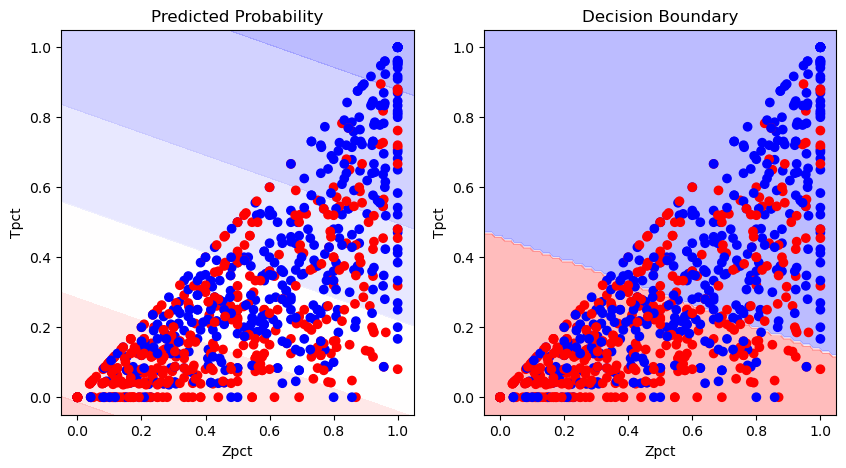

In [11]:
clf = LogisticRegression()
clf.fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2)

# decision boundary code adapted from course notes
DecisionBoundaryDisplay.from_estimator(clf, X, grid_resolution=300, ax=ax[0], cmap='bwr', alpha=0.3, response_method='predict_proba')
DecisionBoundaryDisplay.from_estimator(clf, X, grid_resolution=300, ax=ax[1], cmap='bwr', alpha=0.3, response_method='predict')
ax[0].scatter(X['Zpct'], X['Tpct'], cmap='bwr', c=y)
ax[0].set_ylim([-0.05, 1.05])
ax[0].set_xlim([-0.05, 1.05])
ax[0].set_title('Predicted Probability')
ax[1].scatter(X['Zpct'], X['Tpct'], cmap='bwr', c=y)
ax[1].set_xlim([-0.05, 1.05])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_title('Decision Boundary')
fig.set_figwidth(10)
fig.set_figheight(5)

print(f'Classification Accuracy (Training): {clf.score(X, y)*100:.2f}%')
print(f'Classification Accuracy (Testing): {clf.score(test_set[['Zpct', 'Tpct']], test_set['#']) * 100:.2f}%')
plt.show()

The model classifies points with an accuracy of around 64% - significantly better than just flipping a coin to guess one way or the other, but far from perfect. As stated before it is definitely impossible to classify these points perfectly, because of how mixed together they are (the decision boundary for a logistic regression model is a line through 2-D space). Since we do have a classifying accuracy significantly greater than 50%, it is probably safe to say that #4 boulders are, on average, a bit harder than #1 boulders, but perhaps not by as much as is typically thought.

### K-Neighbors Method.

Here, we will attempt to solve the same problem using the k-neighbors classification algorithm, and compare the training and testing accuracies for $ k = 1, 2, \dots 30 $.

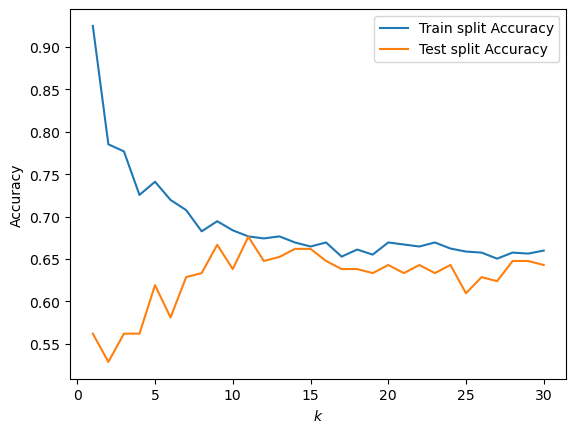

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train_accuracies = []
test_accuracies = []
train_set, test_set = train_test_split(Regional_results, test_size=0.2, stratify=Regional_results['#'], random_state=1)

for k in range(1, 31):
    knc = KNeighborsClassifier(n_neighbors=k)
    X = train_set[['Zpct', 'Tpct']]
    y = train_set['#']
    knc.fit(X, y)

    train_accuracies.append([k, knc.score(X, y)])
    test_accuracies.append([k, knc.score(test_set[['Zpct', 'Tpct']], test_set['#'])])

train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)


fig, ax = plt.subplots()

ax.plot(train_accuracies[:, 0], train_accuracies[:, 1], label='Train split Accuracy')
ax.plot(test_accuracies[:, 0], test_accuracies[:, 1], label='Test split Accuracy')
ax.legend()
ax.set_xlabel('$ k $')
ax.set_ylabel('Accuracy')
plt.show()

Here, the bias-variance tradeoff we expect to see is very apparent. When $ k $ is small, the testing error is low but the training error is realtively high. As k increases (and the model complexity decreases), the testing error decreases and the training error increases, until both level off past $ k = 9 $. 

### Classification with Principal-Component Dimension Reduction.

One might observe that tops and zones are somewhat related to each other - harder climbs tend to have both harder zones and tops, after all, and since every top also scores a zone, tops are a limiting factor on zones. This leads to a question - using principal component analysis, can we reduce the two dimensions of Top% and Zone% into a single 'combined difficulty' dimension, and still get decent results in classification?

In [13]:
from sklearn.decomposition import PCA

# there was something buggy happening with the Dataframe assignments and the documentation told me to write this
pd.options.mode.copy_on_write = True 
# i basically have no idea what it does but it fixed the issue
# something about mutable types and memory allocation idk i'm a math major not a CS major

pca = PCA(n_components=1)

pca.fit(Regional_results[['Zpct', 'Tpct']])
combined = np.array(pca.transform(Regional_results.loc[:, ['Zpct', 'Tpct']]))

Regional_results['Combined'] = combined[:]

We can visualize the first principal compenent by plotting the axis it deterimines on the original scatterplot, as well as by creating a histogram showing how the points are distributed after being projected onto this axis:

(0.5421019152018077, 0.30049327596852743)

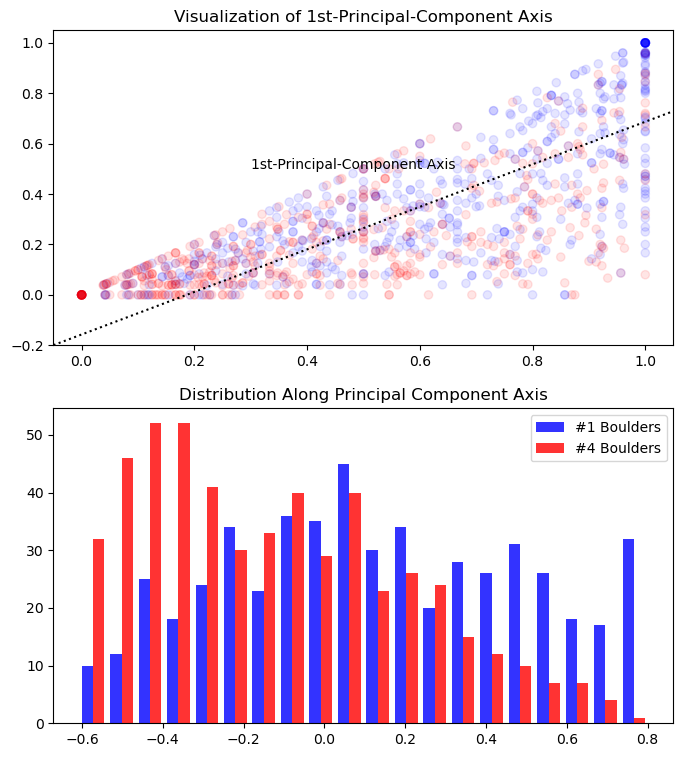

In [14]:

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].scatter(Regional_results['Zpct'], Regional_results['Tpct'], cmap='bwr', c=Regional_results['#'], alpha=0.10)
ax[0].set_xlim([-0.05, 1.05]);
ax[0].set_ylim([-0.20, 1.05]);

graph_points = np.linspace(-0.05, 1.05, 2)
slope = pca.components_[0, 1]/pca.components_[0, 0]

ax[0].axline(xy1=(pca.mean_[0], pca.mean_[1]), slope=pca.components_[0, 1]/pca.components_[0, 0], c='k', ls=':')
ax[0].annotate('1st-Principal-Component Axis', (0.3, 0.5))
ax[0].set_title('Visualization of 1st-Principal-Component Axis')

bars = (Regional_results.loc[Regional_results['#'] == 1, 'Combined'], Regional_results.loc[Regional_results['#'] == 4, 'Combined'])
ax[1].hist(bars, color=('b', 'r'), bins=20, alpha=0.8, label=('#1 Boulders', '#4 Boulders'))
ax[1].set_title('Distribution Along Principal Component Axis')
ax[1].legend()

fig.set_size_inches(8, 9)

(pca.mean_[0], pca.mean_[1])

Now, we can repeat the previous logistic-regression classification, but using only the single 'Combined' feature. 

In [15]:
train_set, test_set = train_test_split(Regional_results, test_size=0.2, stratify=Regional_results['#'], random_state=88)

X = train_set[['Combined']]
y = train_set['#']

clf.fit(X, y)

print(f'Classification Accuracy (Training): {clf.score(X, y)*100:.2f}%')
print(f'Classification Accuracy (Testing): {clf.score(test_set[['Combined']], test_set['#'])*100:.2f}%')

Classification Accuracy (Training): 62.89%
Classification Accuracy (Testing): 63.81%


Using this single principal component, we lose only a couple percentage points of classification accuracy. Though at this relatively small sample size (n~1000) and feature space (2) the difference in execution time is negligible, if the sample size or feature space were much bigger this reduction in dimension could speed up calculation significantly.

# Extra: Demonstration of Web Scraping/Data Collection Methods.

This extra section is a short demonstration of how the data for this project was collected. The original data collection was significantly more involved - I had scraped results for individual climbers rather than individual boulders from over 400 competitions. Here, I construct a small dataset from a single <a href='https://usacresults.org/scores/?eid=1243'>competition</a>, in the same format as the dataset for this project.

### Scraping

The Selenium package allows python to control a browser window, simulating live user activity. This is useful for loading the dynamic-HTML elements on the USA climbing results page in which the results are stored. The `implicitly_wait()` function establishes an amount of time to wait for an element to appear when finding it, in this case 5 seconds. Once the driver finds the desired element, the tbody that holds the competition results, we use the BeutifulSoup constructor from the bs4 package to parse the html.




In [1]:
import selenium.webdriver as Webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

driver = Webdriver.Chrome()
driver.get('https://usacresults.org/scores/?eid=1243')
driver.implicitly_wait(5)
body = driver.find_element(By.XPATH, "/html/body/section/div[3]/table[1]/tbody[1]")
soup = BeautifulSoup(driver.page_source, features='lxml')
driver.close()

The `soup` object now holds the HTML source code of the site in an easily indexable and searchable tree. We use the BeautifulSoup methods `.find` and `.find_all` to get a list of \<tbody\> elements that correspond to each round of the compeition in each category. 

In [2]:
score_tbodys = soup.find("table", class_="scoreTable21 scoreBoulder").find_all("tbody")

### Processing

Before we start extracting the data from the `soup`, we define a helper function. If a climber achieves a top or zone on a climb, the \<div\> element that holds the result will hold a number, and we will want to increment a counter by 1. Otherwise, it will hold a \xa0 character, and we will not increment the counter.

In [3]:
def is_success(s):
    if s == '\xa0':
        return 0
    else:
        return 1

Now, we can loop through each table in the `score_tbodys` list, counting the number of tops and zones for each boulder in each round. This step involved a lot of reverse-engineering HTML, and for brevity I will not explain it in detail.

We initialize a list, and append lists to it after every round that correspond to each boulder's results.

In [4]:
data_list = []

for n in range(1, 17): 
    # There are 16 table bodies that contain results - qualifers and finals for all 8 categories.
    tb = score_tbodys[n]

    # 4 Boulders per round. Each list of three elements holds tops, zones, and lowzones for a boulder.
    boulders = [[0, 0, 0],
                [0, 0, 0],
                [0, 0, 0],
                [0, 0, 0],
                ]
    climbers = 0

    # this is where category is stored in the tree
    category = tb.find_all('tr')[0].find_all('td')[1].find_all('div')[1].string[6:] 

    for tr in tb.find_all('tr'): 
        # each table row corresponds to one climber.
        if 'class' in tr.attrs.keys():
            # a no-show climber is skipped.
            pass
        else:
            climbers += 1
            score_data = tr.find_all('td')[7:]
            for i in range(4): 
                # loops once for each boulder
                divs = score_data[i].find_all('div')
                boulders[i][0] += is_success(divs[0].string) # increment tops if the climber topped
                boulders[i][1] += is_success(divs[1].string) # increment zone
                if len(divs) > 4: 
                    # only if the round uses low zones
                    boulders[i][2] += is_success(divs[2].string) # increment lowzone

    round = 'final'

    # the last 8 table bodies correspond to qualifier rounds
    if n > 8:
        round = 'quali'

    # we know some things about this comp already - specifically the eid, location, and level
    # but in the original project I wrote code to parse that information as well.
    # we append a list that corresponds to one row of our eventual dataframe:
    for i in range(4):
        data_list.append([1243, category, 'D3', 'Divisional', round, i + 1, climbers] + boulders[i])

for row in data_list[0:5]:
    print(row)


[1243, 'FJR', 'D3', 'Divisional', 'final', 1, 13, 3, 12, 0]
[1243, 'FJR', 'D3', 'Divisional', 'final', 2, 13, 4, 10, 0]
[1243, 'FJR', 'D3', 'Divisional', 'final', 3, 13, 1, 12, 0]
[1243, 'FJR', 'D3', 'Divisional', 'final', 4, 13, 1, 5, 0]
[1243, 'FYA', 'D3', 'Divisional', 'final', 1, 13, 3, 13, 0]


Finally, using pandas, we can convert this nested list into a dataframe. 

In [5]:
from pandas import DataFrame

column_titles = ['eid', 'Category', 'Location', 'Level', 'Round', '#', 'Climbers', 'Tops', 'Zones', 'Lows']
New_df = DataFrame(data_list, columns=column_titles)
New_df.head(12)

,eid,Category,Location,Level,Round,#,Climbers,Tops,Zones,Lows
0,1243,FJR,D3,Divisional,final,1,13,3,12,0
1,1243,FJR,D3,Divisional,final,2,13,4,10,0
2,1243,FJR,D3,Divisional,final,3,13,1,12,0
3,1243,FJR,D3,Divisional,final,4,13,1,5,0
4,1243,FYA,D3,Divisional,final,1,13,3,13,0
5,1243,FYA,D3,Divisional,final,2,13,10,10,0
6,1243,FYA,D3,Divisional,final,3,13,2,11,0
7,1243,FYA,D3,Divisional,final,4,13,1,11,0
8,1243,FYB,D3,Divisional,final,1,13,6,9,0
9,1243,FYB,D3,Divisional,final,2,13,1,13,0
